# 課題（iLect上で提出してください）

## 機械学習の基礎（教師あり学習）¶

分析対象データとして、sklearnのdatasetsからload_iris(アヤメの花)を読み込んで、目的変数をiris.target、説明変数をiris.dataとして、決定木、ロジスティック回帰分析とk-NN(k=6で固定）、SVMのモデルを使って、予測と検証（学習データと検証データに分けます）を実施してください。これらの中で、一番正解率が高いモデルは何でしょうか。

提出するときは、以下の点に注意してください。  
>- 以下の関数homeworkの!!WRITE ME!!に処理を書いてください。(**「!!WRITE ME!!」は消して、記入してください。**)
>- 実際の提出は記述されたhomework関数全てになり、**提出場所はilect右上にある青字のHomeworkドロップダウンメニューからHomework 5を選んでください。Solutionに関数を貼り付けてからSaveを押してください。**  
>- 前処理は以下のコードを使って、これを引数としてください。今回は特に標準化等は実施していません。    
>- 学習データと検証データの分け方に違いが生じないように、 train_test_splitのrandom_stateは0にしています。  
>- 返り値は一番正解率が高いモデル名として、文字型にしてください。returnされる値は一つになるようにしてください。なお、モデル名ですが、model.\_\_class\_\_.\_\_name\_\_とすれば取得できます。  
(例)DecisionTreeClassifier　（返り値）

In [17]:
# common
# ロジスティック回帰
from sklearn.linear_model import LogisticRegression
# SVM
from sklearn.svm import LinearSVC
# 決定木
from sklearn.tree import  DecisionTreeClassifier
# k-NN
from sklearn.neighbors import  KNeighborsClassifier

# データ分割
from sklearn.model_selection import train_test_split

#分析対象データ
from sklearn.datasets import load_iris

# data
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, stratify = iris.target, random_state=0)

# initial value
best_score = 0
best_method = ""

In [37]:
# 決定木クラスの初期化と学習
model = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)
model.fit(X_train, y_train)

print(model.score(X_test, y_test))

best_score = model.score(X_test, y_test)
best_method = model.__class__.__name__


# ロジスティック回帰クラスの初期化と学習
model = LogisticRegression(solver='liblinear',multi_class='auto')
model.fit(X_train, y_train)

print(model.score(X_test, y_test))

if best_score < model.score(X_test, y_test):
    best_score = model.score(X_test, y_test)
    best_method = model.__class__.__name__
    
# k-NNの初期化と学習
model = KNeighborsClassifier(n_neighbors=6)
model.fit(X_train, y_train)

print(model.score(X_test, y_test))

if best_score < model.score(X_test, y_test):
    best_score = model.score(X_test, y_test)
    best_method = model.__class__.__name__
    
# SVCの初期化と学習
model = LinearSVC()
model.fit(X_train, y_train)

print(model.score(X_test, y_test))

if best_score < model.score(X_test, y_test):
    best_score = model.score(X_test, y_test)
    best_method = model.__class__.__name__
    
my_result = best_method

0.9473684210526315
0.9736842105263158
1.0
0.9473684210526315


/Users/kanekotakafumi/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [39]:
best_score

1.0

In [38]:
best_method

'KNeighborsClassifier'

In [24]:
# ロジスティック回帰クラスの初期化と学習
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

if best_score < model.score(X_test, y_test):
    best_score = model.score(X_test, y_test)
    best_method = model.__class__.__name__

/Users/kanekotakafumi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [33]:
# k-NNのモデルの初期化と学習
model = KNeighborsClassifier(n_neighbors=6)
model.fit(X_train, y_train)

if best_score < model.score(X_test, y_test):
    best_score = model.score(X_test, y_test)
    best_method = model.__class__.__name__

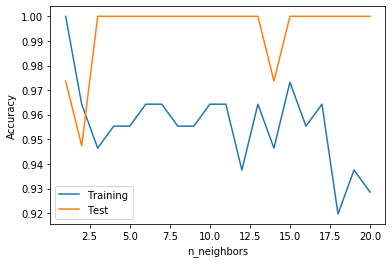

In [32]:
# 可視化ライブラリ
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# グラフ描画用のリストを用意
training_accuracy = []
test_accuracy = []

# 学習
for n_neighbors in range(1, 21):
    model = KNeighborsClassifier(n_neighbors=n_neighbors)
    model.fit(X_train, y_train)
    training_accuracy.append(model.score(X_train, y_train))
    test_accuracy.append(model.score(X_test, y_test))

# グラフを描画
plt.plot(range(1, 21), training_accuracy, label='Training')
plt.plot(range(1, 21), test_accuracy, label='Test')
plt.ylabel('Accuracy')
plt.xlabel('n_neighbors')
plt.legend()

In [36]:
best_score

1.0

In [40]:
# working place. everything 
def homework(X_train, X_test, y_train, y_test,best_score,best_method):
    # 決定木クラスの初期化と学習
    model = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)
    model.fit(X_train, y_train)
    
    best_score = model.score(X_test, y_test)
    best_method = model.__class__.__name__
    
    # ロジスティック回帰クラスの初期化と学習
    model = LogisticRegression(solver='liblinear',multi_class='auto')
    model.fit(X_train, y_train)
    
    if best_score < model.score(X_test, y_test):
        best_score = model.score(X_test, y_test)
        best_method = model.__class__.__name__
    
    # k-NNの初期化と学習
    model = KNeighborsClassifier(n_neighbors=6)
    model.fit(X_train, y_train)
    
    if best_score < model.score(X_test, y_test):
        best_score = model.score(X_test, y_test)
        best_method = model.__class__.__name__
        
    # SVCの初期化と学習
    model = LinearSVC()
    model.fit(X_train, y_train)
    
    if best_score < model.score(X_test, y_test):
        best_score = model.score(X_test, y_test)
        best_method = model.__class__.__name__
    
    my_result = best_method
    return my_result

In [41]:
homework(X_train, X_test, y_train, y_test,best_score,best_method)

/Users/kanekotakafumi/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


'KNeighborsClassifier'